## Different Modeling Techniques
- Continuous (eg age) - 20, 25, 22, 30.5
- Discrete  (eg prob of selection) - Yes/No, 0/1, count of employees
- Equation
    - y = mx + c
    - y = c + b1*x1 + b2 * x2
    - y - DV, x - IV, b1, b2 - Coefficients, c - intercept
-  Dependent variable (y)  - which depends on other variables, can be predicted
-  Independent variable (xs) - which vary , can measure, can be changed

### Linear Regression
-  Predict Y (continous value) on Xs (independent variables - continous / categorical)

### Logistic Regression
-  Predict Y (probability of 0 or 1 ) on X (IV)

### Decision Tree
-  Classification Tree : like Logistic Regression
-  Regression Tree : like Linear Regression

### Clustering
-  Grouping of data based on similarities 
-  eg grouping employees based on gender, salary, et

### Association Rule Analysis
-  Finding association between between variables of employees
-  Those who live more than 20 km away they prefer to work from home

### Time Series Analysis
-  Predict manpower requirements in next few months/ years like stock market predictions

### Sentiment Analysis
-  Classifying feedback into positive or negative sentiments eg. people talk positively about their dept / seniors


In [118]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [119]:
#options
# https://pandas.pydata.org/docs/user_guide/options.html
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
pd.set_option("expand_frame_repr", True)
pd.set_option("max_info_columns", 11)
pd.set_option("display.precision", 3)
pd.set_option('display.width', 1000)  #wrap with full display

## Import Data

In [120]:
df = data('mtcars')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [121]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


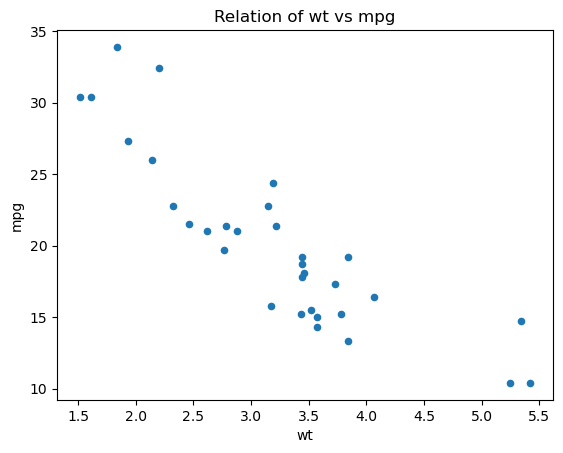

In [122]:
df.sort_values(by='wt').plot.scatter(x='wt',y='mpg', title='Relation of wt vs mpg')
plt.show();
#as wt increases, mpg decreases ? 

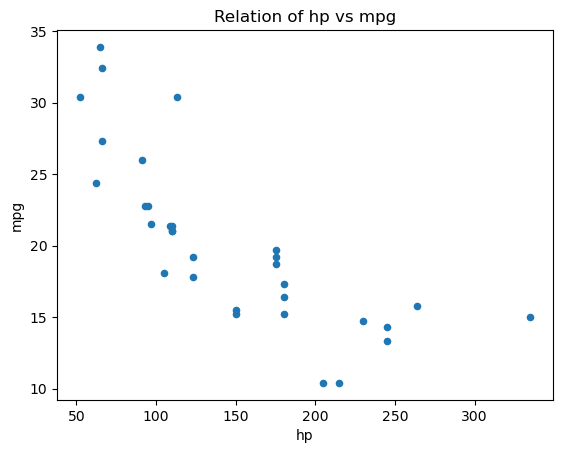

In [123]:
df.plot.scatter(x='hp',y='mpg', title='Relation of hp vs mpg')
plt.show();
#as hp increases, mpg increases ?

In [124]:
df[['wt','mpg','hp']].corr()

,wt,mpg,hp
wt,1.000,-0.868,0.659
mpg,-0.868,1.000,-0.776
hp,0.659,-0.776,1.000


## Linear Regression

In [125]:
#construct a Linear Model
from sklearn.linear_model import LinearRegression

In [126]:
reg1 = LinearRegression()

In [127]:
df1 = df[['wt','mpg','hp']].copy()
df1.head()

,wt,mpg,hp
Mazda RX4,2.620,21.0,110
Mazda RX4 Wag,2.875,21.0,110
Datsun 710,2.320,22.8,93
Hornet 4 Drive,3.215,21.4,110
Hornet Sportabout,3.440,18.7,175


In [128]:
X = df1.drop(columns='mpg')
y = df.mpg
print(X.shape, y.shape)  #X- IV (hp, wt) DV (mpg) : Predict mpg by hp, wt

(32, 2) (32,)


In [129]:
reg1.fit(X,y) #run the model on X, y

LinearRegression()

In [130]:
print('R2 ', reg1.score(X,y).round(2))
#83% of variation in Y (mpg) is dependent on X (wt, hp)

R2  0.83


In [131]:
print('Coefficients ', reg1.coef_)
print(X.columns)
#if u increase wt by 1 unit, mpg will decrease by 3 units (-3)
#reg1.intercept_

Coefficients  [-3.87783074 -0.03177295]
Index(['wt', 'hp'], dtype='object')


In [132]:
#create new set of values
newData1 = pd.DataFrame({'wt':[3,5], 'hp':[200, 100]})
newData1

,wt,hp
0,3,200
1,5,100


In [133]:
print('Predict MPG for new Set of Data ', reg1.predict(newData1).round(2))

Predict MPG for new Set of Data  [19.24 14.66]


In [134]:
# Other advanced steps
# Train / Test Set
# Check for assumptions of Linear Regression
# Check for accuracy of model using rmse, aic
# use other libraries for developing models

## Logistic Regression
-  Predict whether car is automatic or manual if you know wt, mpg, hp

In [135]:
df2 = df[['wt','mpg','hp','am']].copy()
df2.head()

,wt,mpg,hp,am
Mazda RX4,2.620,21.0,110,1
Mazda RX4 Wag,2.875,21.0,110,1
Datsun 710,2.320,22.8,93,1
Hornet 4 Drive,3.215,21.4,110,0
Hornet Sportabout,3.440,18.7,175,0


In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
#seaborn to create confusion matrix

In [137]:
X2 = df2.drop(columns = 'am')
y2 = df2.am
print('IV ', X2.shape, ' DV ', y2.shape)
print('IV ', X2.columns, ' DV ', y2.name)
print('Count of Car types \n', y2.value_counts())

IV  (32, 3)  DV  (32,)
IV  Index(['wt', 'mpg', 'hp'], dtype='object')  DV  am
Count of Car types 
 am
0    19
1    13
Name: count, dtype: int64


<Axes: xlabel='am'>

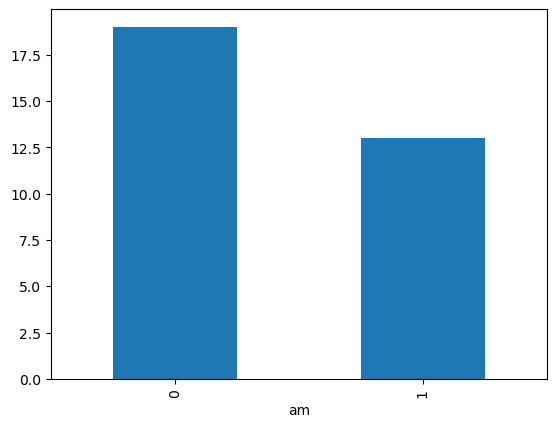

In [138]:
y2.value_counts().plot(kind='bar')
#0 - auto, 1 - manual

In [139]:
#ogreg1 = LogisticRegression(solver='liblinear', random_state=123).fit(X,y)
logreg1 = LogisticRegression(random_state=123)
logreg1.fit(X2,y2)

LogisticRegression(random_state=123)

In [34]:
print(' Classes ', logreg1.classes_)
#print(' : Coeff ', logreg1.coef_, ' : Intercept ', logreg1.intercept_)
print(df2.columns)

 Classes  [0 1]
Index(['wt', 'mpg', 'hp', 'am'], dtype='object')


In [35]:
#create new set of values
newData2 = pd.DataFrame({'wt':[3,5],  'mpg':[20,25], 'hp':[200, 100]})  #same order
newData2

,wt,mpg,hp
0,3,20,200
1,5,25,100


In [36]:
logreg1.predict_proba(newData2)

array([[0.10839249, 0.89160751],
       [0.70838254, 0.29161746]])

In [37]:
logreg1.predict(newData2)
#Manual, Auto 

array([1, 0], dtype=int64)

In [38]:
#confusion matrix with prediction on train data
y2_predict = logreg1.predict(X2)
cm= confusion_matrix(y2, y2_predict)
print(' Confusion Matrix ', cm)
print('\nClassification Report\n', classification_report(y2, y2_predict))  #.91

 Confusion Matrix  [[19  0]
 [ 3 10]]

Classification Report
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       1.00      0.77      0.87        13

    accuracy                           0.91        32
   macro avg       0.93      0.88      0.90        32
weighted avg       0.92      0.91      0.90        32



<Axes: >

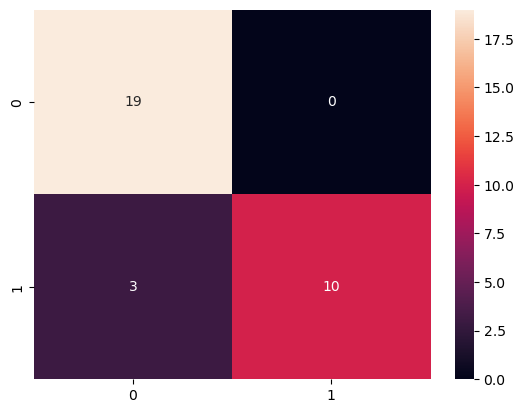

In [39]:
sns.heatmap(cm, annot=True)

In [40]:
#advanced
#train and split data
#auc curve to select partition of prob
#AIC value to check for accurance
#p-value to select coefficients

## Decision Tree
-  Predict Auto/Manual  (eg predict employee will leave or not)

In [41]:
df3 = df[['wt','mpg','hp','carb','am']].copy()
df3.head()

,wt,mpg,hp,carb,am
Mazda RX4,2.620,21.0,110,4,1
Mazda RX4 Wag,2.875,21.0,110,4,1
Datsun 710,2.320,22.8,93,1,1
Hornet 4 Drive,3.215,21.4,110,1,0
Hornet Sportabout,3.440,18.7,175,2,0


In [42]:
X3 = df3.drop(columns='am')
y3 = df2.am
print(X3.shape, y3.shape)

(32, 4) (32,)


In [43]:
#library
from sklearn.tree import DecisionTreeClassifier

In [44]:
#model
clsModel = DecisionTreeClassifier(max_depth=5,random_state=123)
clsModel.fit(X3, y3)  #model with parameter

DecisionTreeClassifier(max_depth=5, random_state=123)

In [45]:
clsModel.classes_  #types of values 0 or 1

array([0, 1], dtype=int64)

In [46]:
print(" Predicted on original Values " , clsModel.predict(X3))
print(" Original Values              " , y3.values)

 Predicted on original Values  [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1]
 Original Values               [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1]


<Axes: >

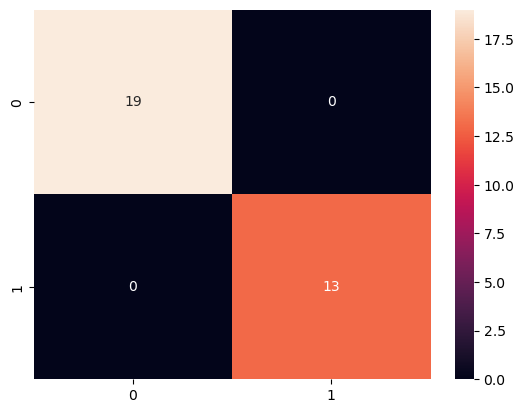

In [47]:
cm3 = confusion_matrix(y3, clsModel.predict(X3))
sns.heatmap(cm3, annot=True)
#good accuracy of the model

In [48]:
#create new set of values
newData3 = pd.DataFrame({'wt':[3,5],  'mpg':[20,25], 'hp':[200, 100], 'carb':[4,3]})  #same order
newData3

,wt,mpg,hp,carb
0,3,20,200,4
1,5,25,100,3


In [49]:
clsModel.predict(newData3)
#Manual , Auto

array([1, 0], dtype=int64)

### Plot the decision tree

In [50]:
from graphviz import Source
from sklearn import tree

[Text(0.625, 0.9, 'x[0] <= 3.18\ngini = 0.482\nsamples = 32\nvalue = [19, 13]'),
 Text(0.4166666666666667, 0.7, 'x[0] <= 3.013\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.25, 0.5, 'x[1] <= 22.15\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.16666666666666666, 0.3, 'x[1] <= 21.45\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.08333333333333333, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.5833333333333334, 0.5, 'x[3] <= 3.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.7, 'x[3] <= 6.0\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.9166666666666666, 0.5, 'gini = 0.0\nsamples = 1\nvalue 

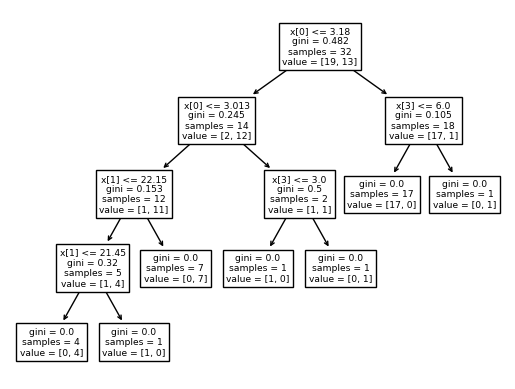

In [51]:
tree.plot_tree(decision_tree=clsModel)

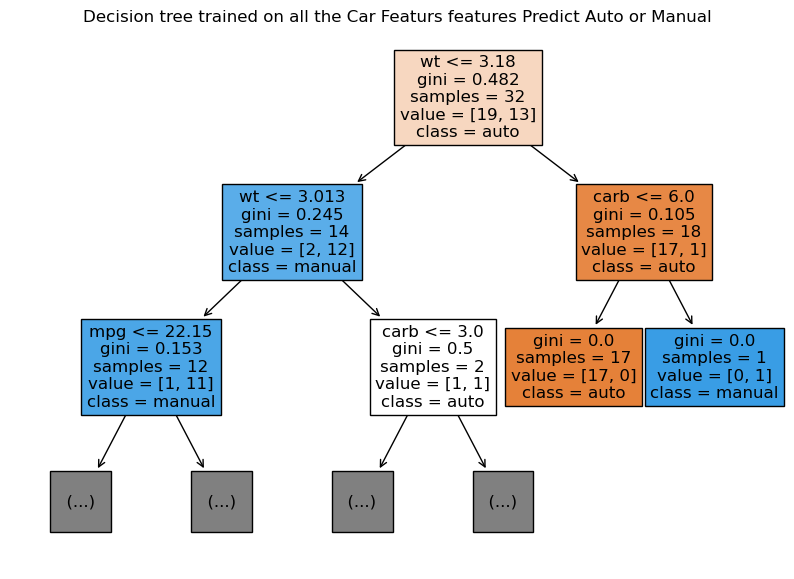

In [52]:
plt.figure(figsize=(10,7))
tree.plot_tree(clsModel, filled=True, feature_names=['wt', 'mpg', 'hp','carb'], class_names=['auto','manual'], fontsize=12, max_depth=2)
plt.title("Decision tree trained on all the Car Featurs features Predict Auto or Manual")
plt.show();

In [53]:
# advanced
# train / Test Set
# regression Tree
# accuracy using classification score, confusion matrix, rmse
# plot tree to undersand better
# tune hyper parameters - gini, entropy, depth, 

## Clustering
- grouping of data into smaller clusters which are homogenous within themselves

In [54]:
df4 = df[['am','mpg','wt','hp','gear']].copy()
df4.head()

,am,mpg,wt,hp,gear
Mazda RX4,1,21.0,2.620,110,4
Mazda RX4 Wag,1,21.0,2.875,110,4
Datsun 710,1,22.8,2.320,93,4
Hornet 4 Drive,0,21.4,3.215,110,3
Hornet Sportabout,0,18.7,3.440,175,3


In [55]:
# libraries
from sklearn.cluster import KMeans

In [56]:
#model
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=123)
kmeans.fit(df4)

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3, n_init=10, random_state=123)

In [57]:
print('Final locations of the centroid' )
np.round(kmeans.cluster_centers_)   #these scaled values of   df[['am','mpg','wt','hp','gear']]

Final locations of the centroid


array([[  0.,  16.,   4., 178.,   3.],
       [  1.,  24.,   3.,  94.,   4.],
       [  0.,  15.,   4., 264.,   4.]])

In [58]:
kmeans.predict(df4)

array([1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0,
       0, 2, 0, 1, 1, 1, 2, 0, 2, 1])

In [59]:
df4['cluster'] = kmeans.predict(df4)

In [60]:
df4.sort_values(by='cluster')

,am,mpg,wt,hp,gear,cluster
Lincoln Continental,0,10.4,5.424,215,3,0
Cadillac Fleetwood,0,10.4,5.250,205,3,0
Merc 450SLC,0,15.2,3.780,180,3,0
Merc 450SL,0,17.3,3.730,180,3,0
Merc 450SE,0,16.4,4.070,180,3,0
AMC Javelin,0,15.2,3.435,150,3,0
Dodge Challenger,0,15.5,3.520,150,3,0
Hornet Sportabout,0,18.7,3.440,175,3,0
Ferrari Dino,1,19.7,2.770,175,5,0
Pontiac Firebird,0,19.2,3.845,175,3,0


In [63]:
df4.groupby('cluster').agg({'mpg':['mean', 'std'], 'hp':['std', 'max'], 'wt':['mean', 'std']})

mpg                   hp             wt          
              mean       std        std  max      mean       std
cluster                                                         
0        15.800000  3.281599  20.282724  215  3.926400  0.820735
1        24.223529  5.010181  22.872248  123  2.599588  0.658384
2        14.620000  0.920326  41.589662  335  3.899000  0.842959

In [64]:
# advanced
# hlclust
# optimal no of clusters - check by knee locator

## WordCloud

In [65]:
countries = {'India','Australia','Germany','USA','Russia', 'China', 'India', 'Poland', 'Spain', 'Canada', 'Italy', 'Japan','Vulgar'}
', '.join(list(countries))

'Canada, Russia, Germany, Poland, China, Australia, India, Japan, Spain, Italy, Vulgar, USA'

In [66]:
univ = np.random.randint(20, 200, len(countries))
univ

array([124,  67, 180,  36, 148, 169, 185,  32,  68,  66, 136,  84])

In [67]:
df6 = pd.DataFrame({'country':list(countries), 'universities':univ})
df6.head()

,country,universities
0,Canada,124
1,Russia,67
2,Germany,180
3,Poland,36
4,China,148


In [68]:
df6.sort_values(by='universities', ascending=False)

,country,universities
6,India,185
2,Germany,180
5,Australia,169
4,China,148
10,Vulgar,136
0,Canada,124
11,USA,84
8,Spain,68
1,Russia,67
9,Italy,66


In [70]:
#library
from wordcloud import WordCloud, STOPWORDS

In [71]:
tuples1 = [ tuple(x) for x in df6.values]
tuples1
#words.to_dict()

[('Canada', 124),
 ('Russia', 67),
 ('Germany', 180),
 ('Poland', 36),
 ('China', 148),
 ('Australia', 169),
 ('India', 185),
 ('Japan', 32),
 ('Spain', 68),
 ('Italy', 66),
 ('Vulgar', 136),
 ('USA', 84)]

In [72]:
dictWords = {}
for key, val in tuples1:    dictWords.setdefault(key, val)
print(dictWords)

{'Canada': 124, 'Russia': 67, 'Germany': 180, 'Poland': 36, 'China': 148, 'Australia': 169, 'India': 185, 'Japan': 32, 'Spain': 68, 'Italy': 66, 'Vulgar': 136, 'USA': 84}


In [87]:
#model
wcF1 = WordCloud(scale=.8, prefer_horizontal=.5, font_step=2, min_font_size=10, max_font_size=100, \
                 include_numbers = True, background_color="white", stopwords=['Vulgar'])

In [88]:
wcF1.generate_from_frequencies(frequencies=dictWords)
wcF1

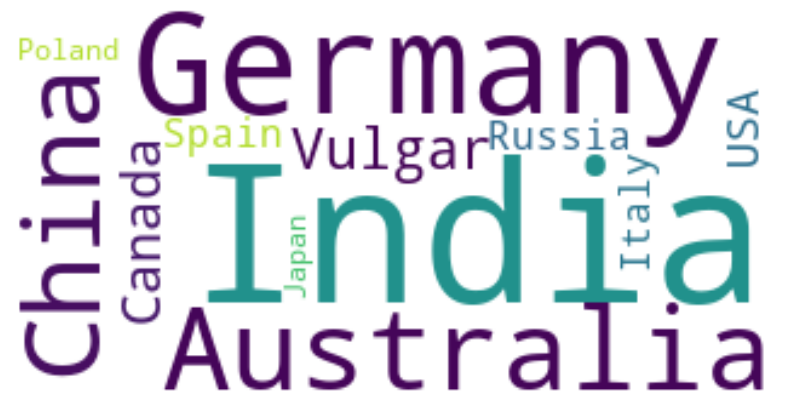

In [89]:
#show plot
plt.figure(figsize=(10,7))
plt.imshow(wcF1, interpolation="bilinear")
plt.axis("off")
plt.show();

In [90]:
# some error here.. stopwords not getting removed

In [91]:
#word cloud from text
pmText = " Today, all Indians in the country and also abroad are celebrating the festival of independence. On this day of sacred festival of independence, the prime servant of India extends greetings to all dear countrymen.I am present amidst you not as the Prime Minister, but as the Prime Servant. The freedom struggle was fought for so many years, so many generations laid down their lives, innumerable people sacrificed their lives and youth, spent their entire lives behind bars. Today, I pay my respect, greetings and homage to all those who laid their lives for the country's independence. I also pay my respects to the crores of citizens of this country on the pious occasion of India's independence, and recall all those martyrs who had laid down their lives in India's struggle for freedom. The day of independence is a festival when we take a solemn pledge of working for the welfare of mother India, and also for the welfare of the poor, oppressed, dalits, the exploited & the backward people of our country.  My dear countrymen, a national festival is an occasion to refine and rebuild the national character. This National festival inspires us to resolve ourselves to lead a life where our character gets refined further, to dedicate ourselves to the nation and our every activity is linked to the interest of the nation and only then this festival of freedom can be a festival of inspiration to take India to newer heights."

In [92]:
len(pmText)

1428

In [93]:
counts = WordCloud().process_text(pmText)
sorted(counts.items())[1:5]

[('Indians', 1), ('Minister', 1), ('Prime', 3), ('Today', 2)]

In [94]:
wc2 = WordCloud(colormap='coolwarm').generate(pmText)
wc2

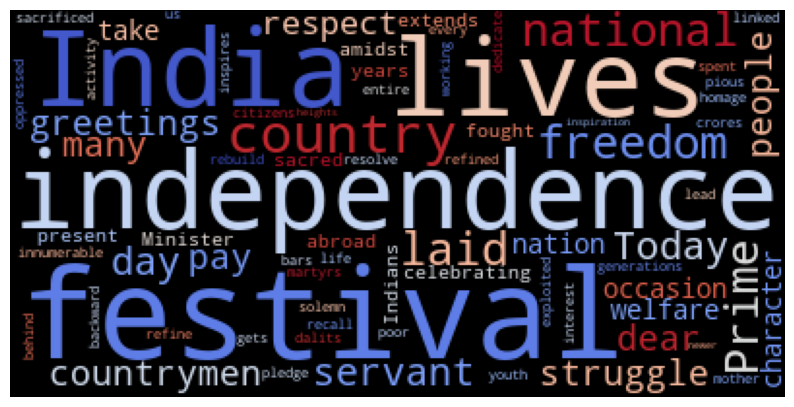

In [95]:
plt.figure(figsize=(10,7))
plt.imshow(wc2)
plt.axis('off')
plt.show();

In [96]:
# advance word cloud 
# sentiment analysis
# shape of image
# different methods & options

## Time Series
-  Plot, predict 

In [7]:
# datasets in pydataset
data().head()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students


In [97]:
airp = data('AirPassengers')
airp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1 to 144
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           144 non-null    float64
 1   AirPassengers  144 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.4 KB


In [98]:
#airp.head()
airp.tail()

,time,AirPassengers
140,1960.583333,606
141,1960.666667,508
142,1960.750000,461
143,1960.833333,390
144,1960.916667,432


In [99]:
d1 = 1960.583333
import math
frac, whole = math.modf(d1)
print(frac,whole)

0.5833330000000387 1960.0


In [100]:
import datetime as dt
#print(dt.datetime.fromtimestamp(0.083333))
print(dt.datetime.fromtimestamp(34944).strftime('%m%Y'))

011970


In [104]:
from astropy.time import Time
input_date =  dt.datetime(2007, 4, 14, 11, 42, 50)
date1 =1949.166667
astropy_time_object = Time(date1,format='decimalyear')
#astropy_date = Date(input_date, format = 'date')
print(astropy_time_object.value)#, astropy_date)

1949.166667


C:\ProgramData\Anaconda3\Lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\ProgramData\Anaconda3\Lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\ProgramData\Anaconda3\Lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\ProgramData\Anaconda3\Lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [105]:
airp['yearMon'] = airp['time'].apply(lambda x: dt.datetime.fromtimestamp(x).strftime('%Y-%m'))
airp.head()

,time,AirPassengers,yearMon
1,1949.000000,112,1970-01
2,1949.083333,118,1970-01
3,1949.166667,132,1970-01
4,1949.250000,129,1970-01
5,1949.333333,121,1970-01


In [106]:
url='https://raw.githubusercontent.com/dupadhyaya/hrAnalytics/main/data/misc/AirPassengers.csv'
file='../data/misc/AirPassengers.csv'
df7 = pd.read_csv(url)
df7.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [107]:
df7.columns = ['month','passengers']
df7.set_index('month', inplace=True)
df7.head()

,passengers
month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


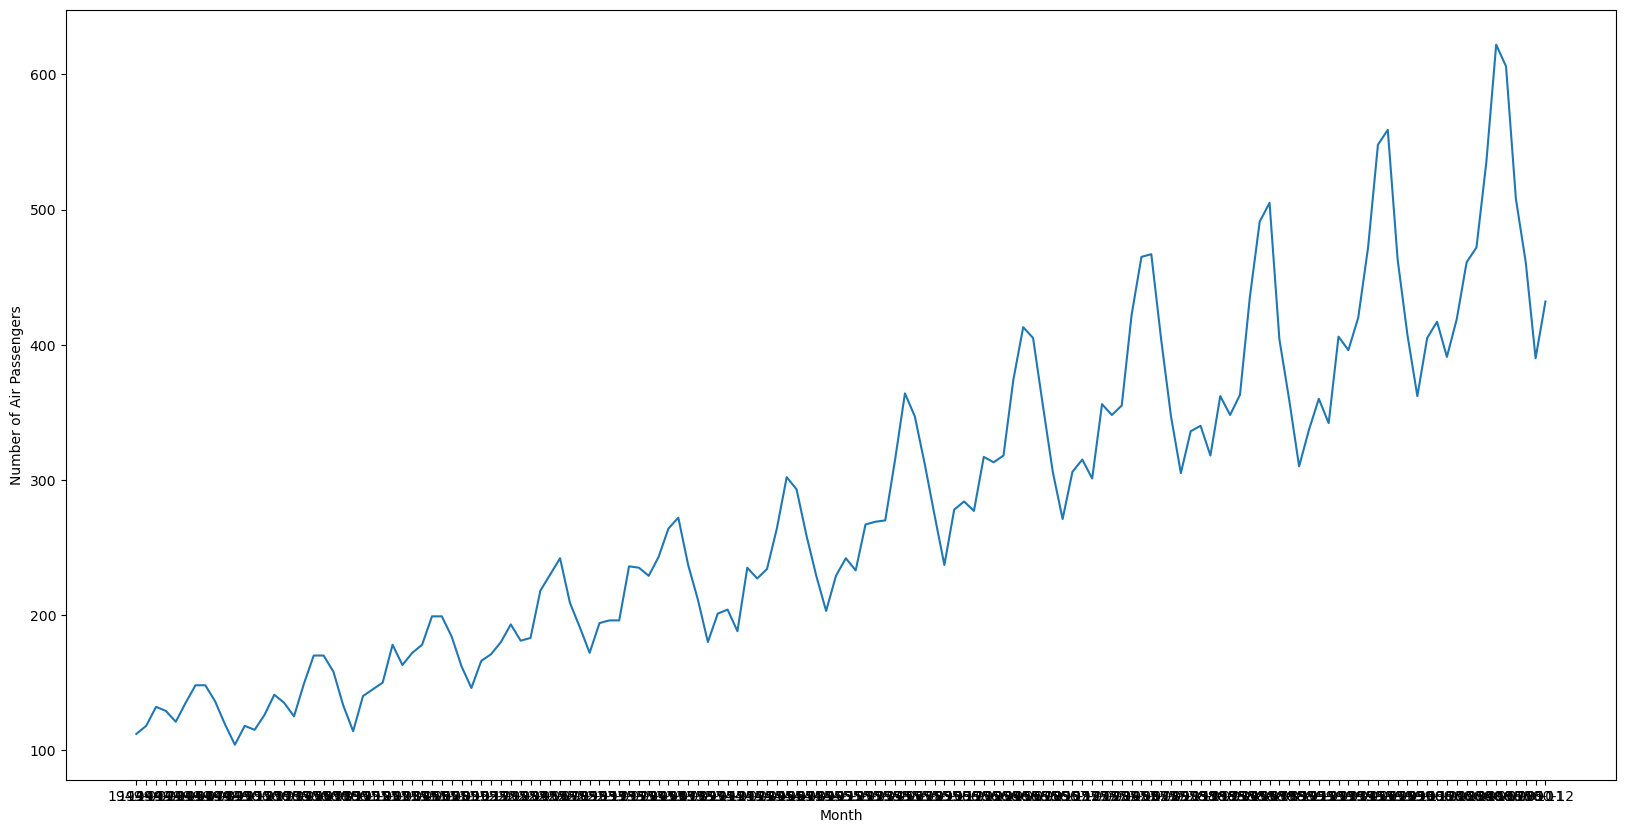

In [108]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(df7)
plt.show();

In [109]:
rolmean=df7.rolling(window=6).mean()
rolstd= df7.rolling(window=6).std()
print(rolmean.head(6))
print(rolstd.head(6))

         passengers
month              
1949-01         NaN
1949-02         NaN
1949-03         NaN
1949-04         NaN
1949-05         NaN
1949-06       124.5
         passengers
month              
1949-01         NaN
1949-02         NaN
1949-03         NaN
1949-04         NaN
1949-05         NaN
1949-06    8.916277


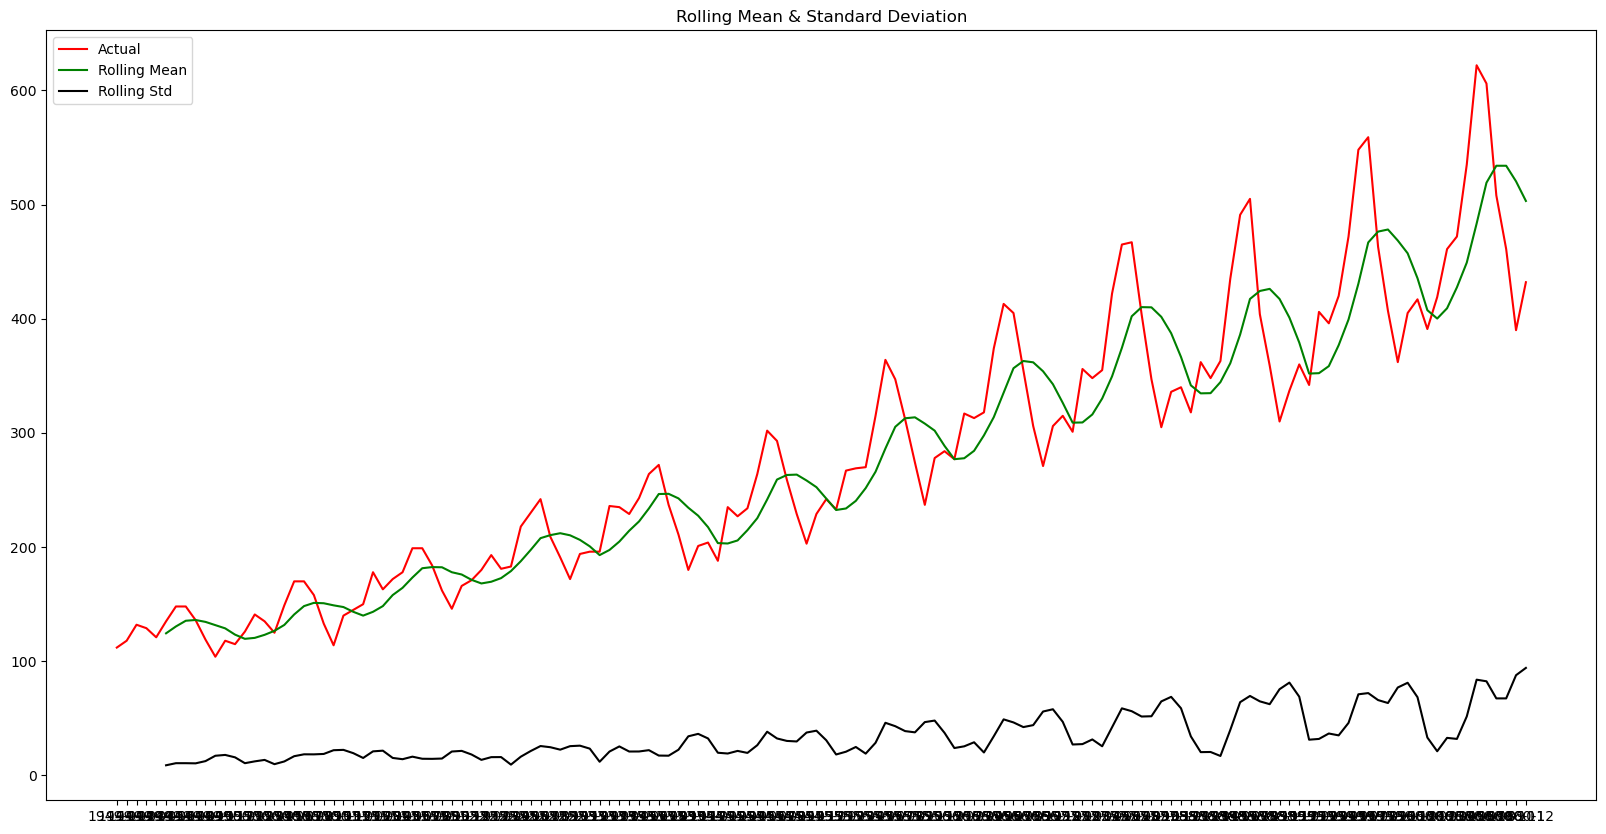

In [110]:
plt.figure(figsize=(20,10))
actual=plt.plot(df7, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [111]:
# advanced TS
# ARIMA forecasting
# prediction over perids
# plot stock prices

# Stock Market Analysis

In [112]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

In [113]:
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [114]:
data = yf.download('GOOG',   start=start_date,   end=end_date, progress=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-10-21 to 2023-10-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [115]:
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2022-10-21   98.459999  101.620003   98.230003  101.480003  101.480003   
1 2022-10-24  102.089996  103.099998  100.300003  102.970001  102.970001   
2 2022-10-25  103.300003  105.099998  103.019997  104.930000  104.930000   
3 2022-10-26   96.760002   98.540001   94.570000   94.820000   94.820000   
4 2022-10-27   94.309998   95.169998   91.900002   92.599998   92.599998   

     Volume  
0  28988700  
1  24680800  
2  29910200  
3  71504300  
4  54036500  


# end here..
-  Keep practising.. every day.. everytime bring your data to python and play with data